# Time Series with ARIMA, SARIMA, LSTM

[Kaggle - AirPassengers](https://www.kaggle.com/rakannimer/air-passengers)

**Purpose:** Tutorial of ARIMA, SARIMA & LSTM and compare the those models

**Objective:** Build a model to forecast number of passengers

# Table of contents
1. [Time-series introduction](#intro)
2. [EDA](#eda)
    1. [Rolling mean & rolling std](#2.1)
    2. [Augmented Dickey–Fuller test to test if Stationarity](#2.2)
    2. [Seasonal Decomposition](#2.3)
3. [Data Transformation to achieve Stationarity](#data-transform)
    1. [Log Scale Transformation](#log)
    2. [Exponential Decay Transformation](#exp)
    3. [Time Shift Transformation](#shift)
4. [ARIMA Model](#arima)
    1. [Finding params - Plotting ACF & PACF](#4.1)
    2. [Build ARIMA model & train](#4.2)
    3. [Prediction / forecasting & Reverse transformations](#4.3)
5. [SARIMAX Model](#sarimax)
    1. [Finding params - Auto Search](#5.1)
    2. [Build SARIMAX model & train](#5.2)
    3. [Prediction / forecasting](#5.3)
6. [LSTM Model](#lstm)
    1. [Time-series data generator](#6.1)
    2. [Build LSTM model](#6.2)
    3. [Model Evaluation](#6.3)
    4. [Prediction / forecasting](#6.4)
7. [Conclusion](#conclusion)

# 1) Time-series introduction <a name="intro"></a>

**1. What is Time series analysis?**  
A. Time Series is a series of observations taken at specified time intervals usually equal intervals. Analysis of the series helps us to predict future values based on previous observed values. In Time series, we have only 2 variables, time & the variable we want to forecast.  

  
**2. Why & where Time Series is used?**  
A. Time series data can be analysed in order to extract meaningful statistics and other charecteristsics. It's used in atleast the 4 scenarios:  
    a) Business Forecasting  
    b) Understand past behavior  
    c) Plan the future  
    d) Evaluate current accomplishment  
  
**3. When shouldn't we use Time Series Analysis?**  
A. We don't need to apply Time series in atleast the following 2 cases:  
    a) The dependant variable(y) (that is supposed to vary with time) is constant. Eq: y=f(x)=4, a line parallel to x-axis(time) will always remain the same.  
    b) The dependant variable(y) represent values that can be denoted as a mathematical function. Eq: sin(x), log(x), Polynomials etc. Thus, we can directly get value at some time using the function itself. No need of forecasting.  
  
**4. What are the components of Time Series?**  
A. There are 4 components:  
    a) Trend - Upward & downward movement of the data with time over a large period of time. Eq: Appreciation of Dollar vs rupee.  
    b) Seasonality - seasonal variances. Eq: Ice cream sales increases in Summer only  
    c) Noise or Irregularity - Spikes & troughs at random intervals  
    d) Cyclicity - behavior that repeats itself after large interval of time, like months, years etc.  
    
**5. What is Stationarity?**    
A. Before applying any statistical model on a Time Series, the series has to be staionary, which means that, over different time  periods,  
    a) It should have constant mean.  
    b) It should have constant variance or standard deviation.  
    c) Auto-covariance should not depend on time.  

Trend & Seasonality are two reasons why a Time Series is not stationaru & hence need to be corrected.
    
**6. Why does Time Series(TS) need to be stationary?**  
A. It is because of the following reasons:  
    a) If a TS has a particular behavior over a time interval, then there's a high probability that over a different interval, it will have same behavior, provided TS is stationary. This helps in forecasting accurately.  
    b) Theories & Mathematical formulas ae more mature & easier to apply for as TS which is stationary.  

**7. Tests to check if a series is stationary or not**  
A. There are 2 ways to check for Stationarity of a TS:  
    a) Rolling Statistics - Plot the moving avg or moving standard deviation to see if it varies with time. Its a visual technique.  
    b) ADCF Test - Augmented Dickey–Fuller test is used to gives us various values that can help in identifying stationarity. The Null hypothesis says that a TS is non-stationary. It comprises of a **Test Statistics** & some **critical values** for some confidence levels. If the Test statistics is less than the critical values, we can reject the null hypothesis & say that the series is stationary. THE ADCF test also gives us a **p-value**. Acc to the null hypothesis, lower values of p is better.
    
**8. What is ARIMA model?**      
A. ARIMA(Auto Regressive Integrated Moving Average) is a combination of 2 models AR(Auto Regressive) & MA(Moving Average). It has 3 hyperparameters - P(auto regressive lags),d(order of differentiation),Q(moving avg.) which respectively comes from the AR, I & MA components. The AR part is correlation between prev & current time periods. To smooth out the noise, the MA part is used. The I part binds together the AR & MA parts. 

**9. How to find value of P & Q for ARIMA ?**  
A. We need to take help of ACF(Auto Correlation Function) & PACF(Partial Auto Correlation Function) plots.
ACF & PACF graphs are used to find value of P & Q for ARIMA. We need to check, for which value in x-axis, graph line drops to 0 in y-axis for 1st time.  
From PACF(at y=0), get P  
From ACF(at y=0), get Q  

**10. What Is ADCF test?**  
A. In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity. It is an augmented version of the Dickey–Fuller test for a larger and more complicated set of time series models.

The augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.

p value(0<=p<=1) should be as low as possible. Critical values at different confidence intervals should be close to the Test statistics value.

**11. What is Exponential Smoothing?**  
A. *Exponential smoothing* is a rule of thumb technique for smoothing time series data using the exponential window function. Whereas in the simple moving average the past observations are weighted equally, exponential functions are used to assign exponentially decreasing weights over time. It is an easily learned and easily applied procedure for making some determination based on prior assumptions by the user, such as seasonality. Exponential smoothing is often used for analysis of time-series data.

The raw data sequence is often represented by ${x_{t}}$ beginning at time $t=0$, and the output of the exponential smoothing algorithm is commonly written as ${s_{t}}$, which may be regarded as a best estimate of what the next value of $x$ will be. When the sequence of observations begins at time $t=0$, the simplest form of exponential smoothing is given by the formulas:  

$s_{0} = x_{0}$  
$s_{t} = α*x_{t} + (1-α)*s_{t-1}$  , $t>0$  

where $α$ is the smoothing factor, and $0<α<1$.

**12. What is Exponential decay?**  
A. A quantity is subject to exponential decay if it decreases at a rate proportional to its current value. Symbolically, this process can be expressed by the following differential equation, where N is the quantity and λ (lambda) is a positive rate called the exponential decay constant:

$dN/dt = -λN$

The solution to this equation (see derivation below) is:  
$N(t) = N_{0}*e^{-λt}$  

where N(t) is the quantity at time t, and N0 = N(0) is the initial quantity, i.e. the quantity at time t = 0.  

**Half Life** is the time required for the decaying quantity to fall to one half of its initial value. It is denoted by $t_{1/2}$. The half-life can be written in terms of the decay constant as:  

$t_{1/2} = ln(2)/λ$  


# 2) EDA <a name="eda"></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

Time series deals with 2 columns, one is temporal ie: month in this case & another is the value to be forecasted ie: airplane passengers. To make plotting graphs easier, we set the index of pandas dataframe to the Month. During plots, the index will act by default as the x-axis & since it has only 1 more column, that will be automatically taken as the y-axis

In [2]:
df = pd.read_csv("input/AirPassengers.csv", parse_dates=['Month'], index_col='Month')

display(df.info())
display(df.describe())
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


None

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


From the plot below, we can see that there is a Trend compoenent in th series. Hence, we now check for stationarity of the data

Text(0, 0.5, 'Number of air passengers')

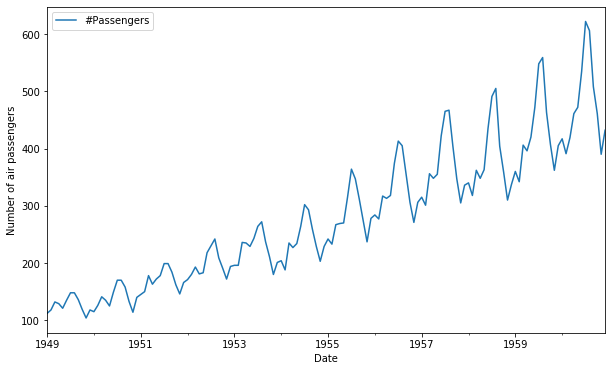

In [3]:
## plot graph
df.plot()

plt.xlabel('Date')
plt.ylabel('Number of air passengers')

**Observation:**
* trend*seasonal (increasing seasonal altitude with trend)
* should use log transformation

## 2.1) Rolling mean & rolling std<a name="2.1"></a>

In [4]:
rolmean = df.rolling(window=12).mean()   # window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = df.rolling(window=12).std()

print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


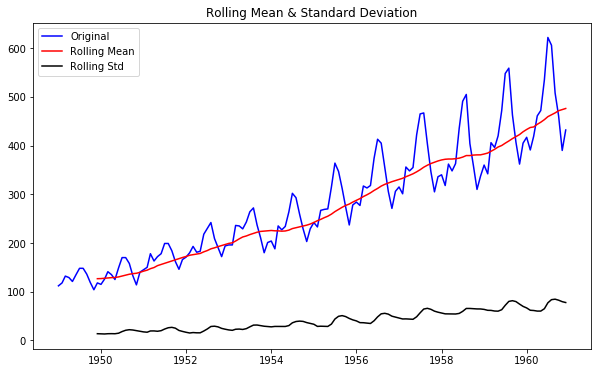

In [5]:
#Plot rolling statistics
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')

plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()

From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so. 

To further augment our hypothesis that the time series is not stationary, let us perform the ADCF test.

## 2.2) Augmented Dickey–Fuller test to test if Stationarity<a name="2.2"></a>

In [6]:
adfuller_result = adfuller(df, autolag='AIC')

dfoutput = pd.Series(adfuller_result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in adfuller_result[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [7]:
adfuller_result

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

For a Time series to be stationary, its ADCF test should have:
1. p-value to be low (according to the null hypothesis)
2. The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics

From the above ADCF test result, we see that p-value(at max can be 1.0) is very large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that **our Time Series at the moment is not stationary**

In [8]:
# Plot rolling statistics & perform Augmented Dickey–Fuller test

def test_stationarity(timeseries):
    
    # Calculate rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Perform Augmented Dickey–Fuller test
    print('Results of Dickey Fuller Test:')
    adfuller_result = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(adfuller_result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in adfuller_result[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

## 2.3) Seasonal Decomposition<a name="2.3"></a>
Let us now break down the 3 components of the log scale series using a system libary function. Once, we separate our the components, we can simply ignore trend & seasonality and check on the nature of the residual part.

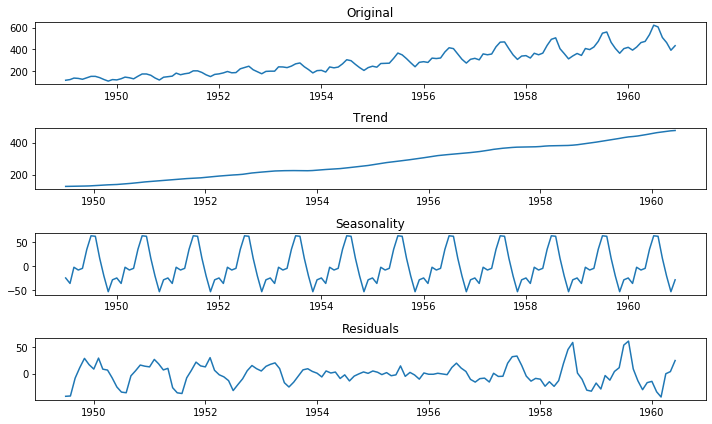

In [9]:
decomposition = seasonal_decompose(df)

observed = decomposition.observed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')   # observed
plt.title('Original')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.title('Trend')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.title('Seasonality')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.title('Residuals')

plt.tight_layout()

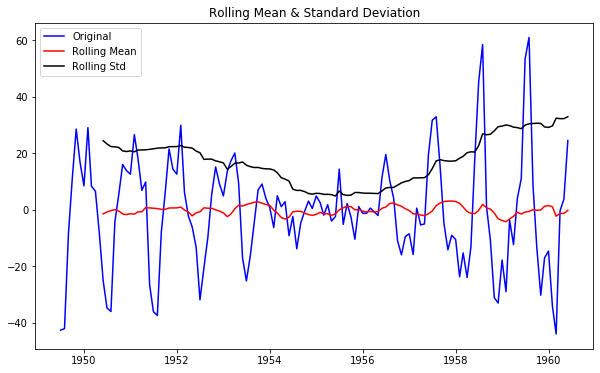

Results of Dickey Fuller Test:
Test Statistic                  -5.298428
p-value                          0.000006
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


In [10]:
#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.
test_stationarity(residual.dropna())

# 3) Data Transformation to achieve Stationarity <a name="DataTransformation"></a>

There are a couple of ways to achieve stationarity through data transformation like taking $log_{10}$,$log_{e}$, square, square root, cube, cube root, exponential decay, time shift and so on ...

In our notebook, lets start of with log transformations. Our objective is to remove the trend component. Hence,  flatter curves( ie: paralle to x-axis) for time series and rolling mean after taking log would say that our data transformation did a good job.

## a) Log Scale Transformation  <a name="log"></a>
Use log transformation when trend*seasonal to remove the increasing seasonal altitude

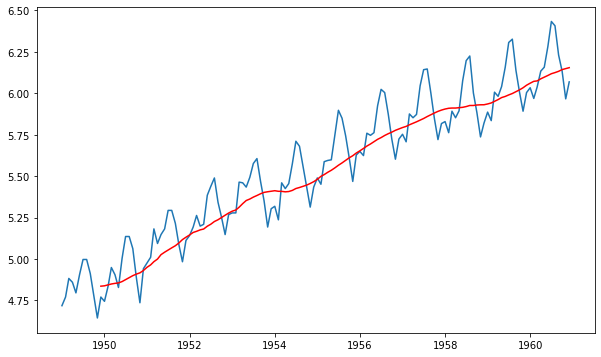

In [11]:
df_log = np.log(df)
movingAverage = df_log.rolling(window=12).mean()
movingSTD = df_log.rolling(window=12).std()

plt.plot(df_log)
plt.plot(movingAverage, color='red')
plt.show()

From above graph, we see that even though rolling mean is not stationary, it is still better than the previous case, where no transfromation were applied to series. So we can atleast say that we are heading in the right direction.

We know from above graph that both the Time series with log scale as well as its moving average have a trend component. Thus we can apply a elementary intuition: subtraction one from the other should remove the trend component of both. Its like:  

$log scale L = stationary part(L1) + trend(LT)$   
$moving avg of log scale A = stationary part(A1) + trend(AT)$   
$result series R = L - A = (L1+LT) - (A1+AT) = (L1-A1) + (LT-AT)$

Since, L & A are series & it moving avg, their trend will be more or less same, Hence  
LT-AT nearly equals to 0  

Thus trend component will be almost removed. And we have,  
  
$R = L1 - A1$ (log - ma), our final non-trend curve

In [12]:
df_logSubMA = df_log.sub(movingAverage).dropna()

df_logSubMA

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


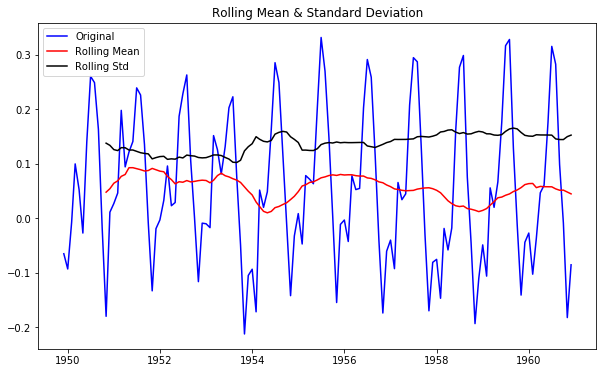

Results of Dickey Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [13]:
test_stationarity(df_logSubMA)

From above graph, we observe that our intuition that *"subtracting two related series having similar trend components will make the result stationary"* is true. We find that:  

1. p-value has reduced from 0.99 to 0.022.  
2. The critical values at 1%,5%,10% confidence intervals are pretty close to the Test Statistic.
Thus, from above 2 points, we can say that our given series is stationary.  

But, in the spirit of getting higher accuracy, let us explore & try to find a better scale than our current log.

Let us try out Exponential decay.  
For further info, refer to my answer 12 at the top of the notebook on it.

## b) Exponential Decay Transformation (vs moving average)   <a name="exp"></a>

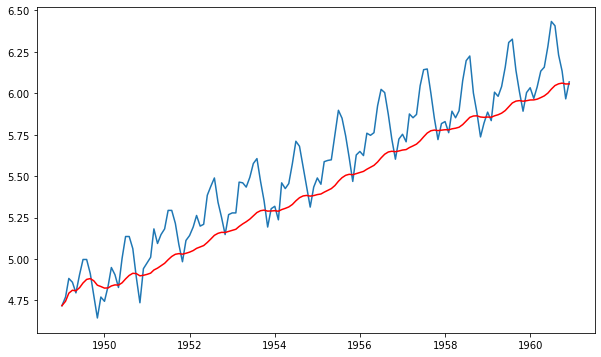

In [14]:
df_log_ewm = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()   # exponentialDecayWeightedAverage

plt.plot(df_log)
plt.plot(df_log_ewm, color='red')
plt.show()

From above graph, it seems that exponential decay is not holding any advantage over log scale as both the corresponding curves are similar. But, in statistics, inferences cannot be drawn simply by looking at the curves. Hence, we perform the ADCF test again on the decay series below.

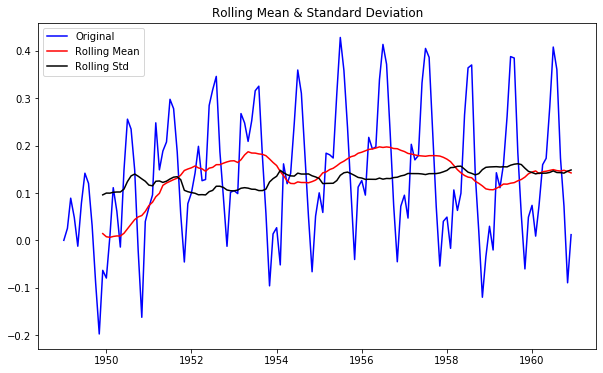

Results of Dickey Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [15]:
df_logSubdf_log_ewm = df_log - df_log_ewm
test_stationarity(df_logSubdf_log_ewm)

We observe that the Time Series is stationary & also the series for moving avg & std. dev. is almost parallel to x-axis thus they also have no trend.  
Also,     
1. p-value has decreased from 0.022 to 0.005.  
2. Test Statistic value is very much closer to the Critical values.  
Both the points say that our current transformation is better than the previous logarithmic transformation. Even though, we couldn't observe any differences by visually looking at the graphs, the tests confirmed decay to be much better.

But lets try one more time & find if an even better solution exists. We will try out the simple time shift technique, which is simply:  

Given a set of observation on the time series:  
$ x0, x1, x2, x3, .... xn $  

The shifted values will be:    
$ null, x0, x1, x2,.... xn $                             <---- basically all xi's shifted by 1 pos to right  

Thus, the time series with time shifted values are:   
$ null, (x1-x0), (x2-x1), (x3-x2), (x4-x3),.... (xn-x_{n-1}) $   

## c) Time Shift Transformation (most simple, we will use this one)  <a name="shift"></a>
To find **d** for ARIMA model (how many times of .diff() is required to make the ts stationary)

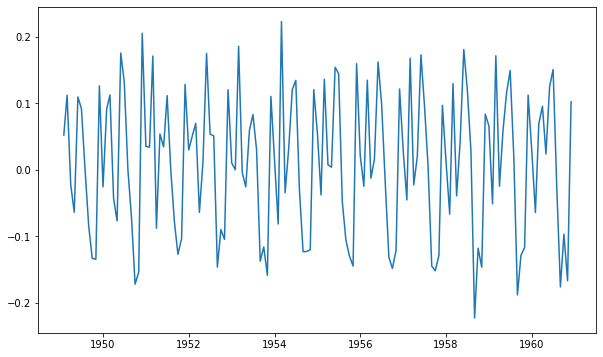

In [16]:
df_log_diff = df_log.diff().dropna()  # diff() = .sub(df_log.shift())

plt.plot(df_log_diff)

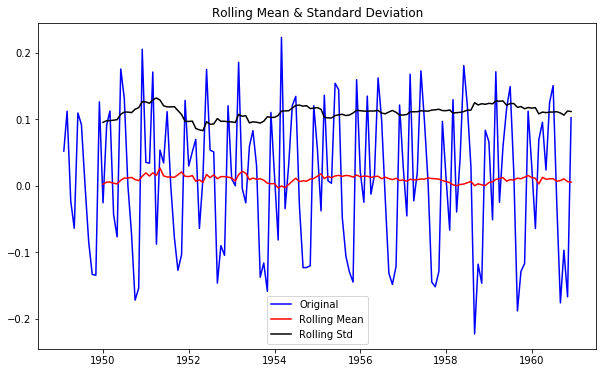

Results of Dickey Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [17]:
test_stationarity(df_log_diff)

From above 2 graphs, we can see that, visually this is the best result as our series along with rolling statistic values of moving avg & moving std. dev. is very much flat & stationary. But, the ADCF test shows us that:
1. p-value of 0.07 is not as good as 0.005 of exponential decay.  
2. Test Statistic value not as close to the critical values as that for exponential decay.  
  
We have thus tried out 3 different transformation: log, exp decay & time shift. For simplicity, we will go with the log scale. The reason for doing this is that we can revert back to the original scale during forecasting.

# 4) ARIMA Model <a name="arima"></a>

## 4.1) Find params for ARIMA model: Plotting ACF & PACF <a name="4.1"></a>
To find **q, p** for **ARIMA** model

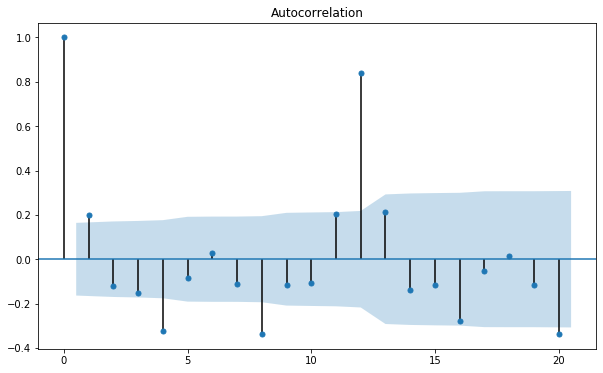

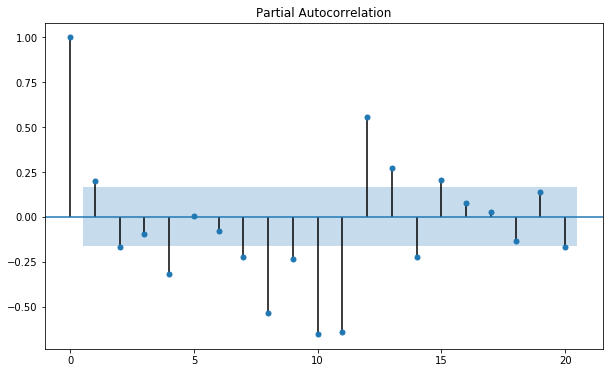

In [18]:
# ACF & PACF plots
# Using Time Shift Transformation

plot_acf(df_log_diff, lags=20)
plot_pacf(df_log_diff, lags=20)
plt.show()

From the ACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, Q = 2

From the PACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, P = 2

ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models will give a value of RSS. Lower RSS values indicate a better model.

## 4.2) Build ARIMA model & train <a name="4.2"></a>

D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


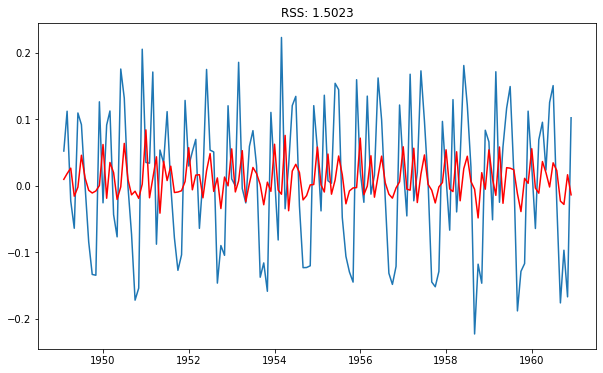

In [19]:
# AR Model
# making order=(2,1,0) gives RSS=1.5023
# Using log transformation because ARIMA including d=1 here (equal to .diff(1))
# Of coz, we use d=0 here and input df_log_diff by ourself (do time shift transformation by ourself)

model = ARIMA(df_log, order=(2,1,0))
results_AR = model.fit()

plt.plot(df_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - df_log_diff['#Passengers'])**2))
print('Plotting AR model')

Plotting MA model


D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


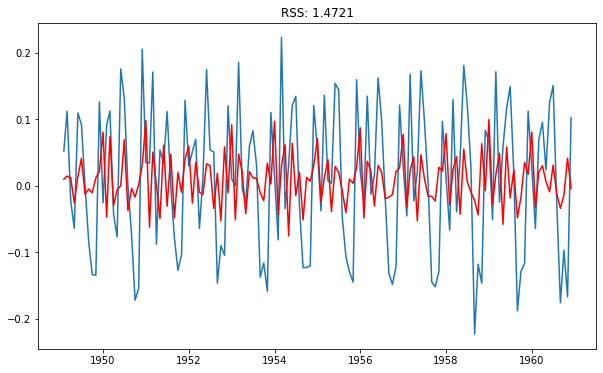

In [20]:
#MA Model
# Using log transformation because ARIMA including d=1 here (equal to .diff(1))

model = ARIMA(df_log, order=(0,1,2))
results_MA = model.fit()

plt.plot(df_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - df_log_diff['#Passengers'])**2))
print('Plotting MA model')

D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA model


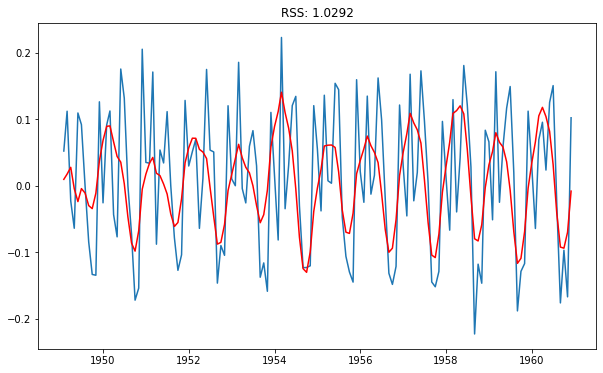

In [21]:
# AR+I+MA = ARIMA model
# Using log transformation because ARIMA including d=1 here (equal to .diff(1))

model = ARIMA(df_log, order=(2,1,2))
results_ARIMA = model.fit()

plt.plot(df_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - df_log_diff['#Passengers'])**2))
print('Plotting ARIMA model')

By combining AR & MA into ARIMA, we see that RSS value has decreased from either case to 1.0292, indicating ARIMA to be better than its individual component models.   

With the ARIMA model built, we will now generate predictions. But, before we do any plots for predictions ,we need to reconvert the predictions back to original form. This is because, our model was built on log transformed data.

## 4.3 Prediction / forecasting & Reverse transformations <a name="4.3"></a>
* log() -> diff()
* cumsum() -> exp()

In [22]:
pred_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(pred_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [23]:
# Inverse of diff() is cumsum()
pred_diff_cumsum = pred_diff.cumsum()
print(pred_diff_cumsum)

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
                ...   
1960-08-01    1.372552
1960-09-01    1.280203
1960-10-01    1.186189
1960-11-01    1.116266
1960-12-01    1.108139
Length: 143, dtype: float64


In [24]:
pred_log = pd.Series(df_log['#Passengers'].iloc[0], index=df_log.index)
pred_log = pred_log.add(pred_diff_cumsum, fill_value=0) # fill na with 0 when add
pred_log

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
                ...   
1960-08-01    6.091051
1960-09-01    5.998701
1960-10-01    5.904688
1960-11-01    5.834764
1960-12-01    5.826638
Length: 144, dtype: float64

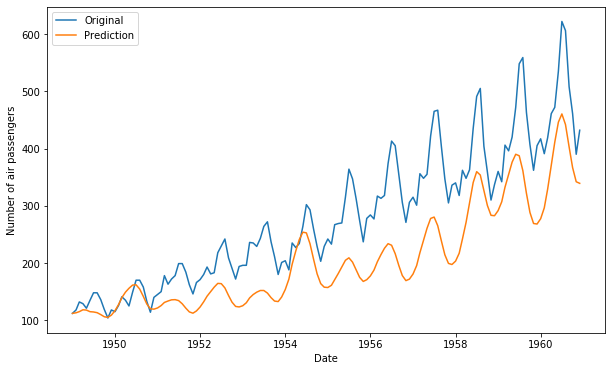

In [25]:
# Inverse of log() is exp()
pred = np.exp(pred_log)
plt.plot(df, label='Original')
plt.plot(pred, label='Prediction')

plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.legend()
plt.show()

We see that our predicted forecasts are very close to the real time series values indicating a fairly accurate model.

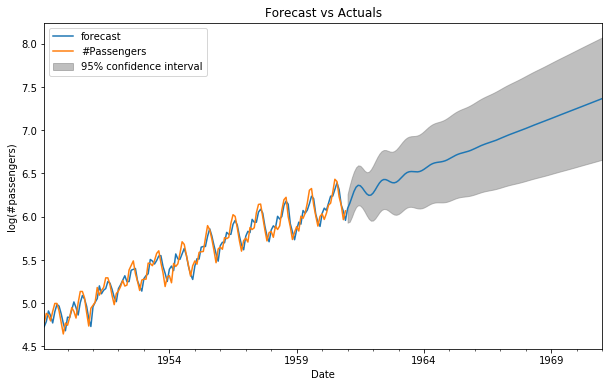

In [26]:
# We have 144(existing data of 12 yrs in months) data points. 
# And we want to forecast for additional 120 data points or 10 yrs.
results_ARIMA.plot_predict(start=1, end=264)   # 144(12yrs) + 120(10yrs)

plt.xlabel('Date')
plt.ylabel('log(#passengers)')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left')
plt.show()

D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


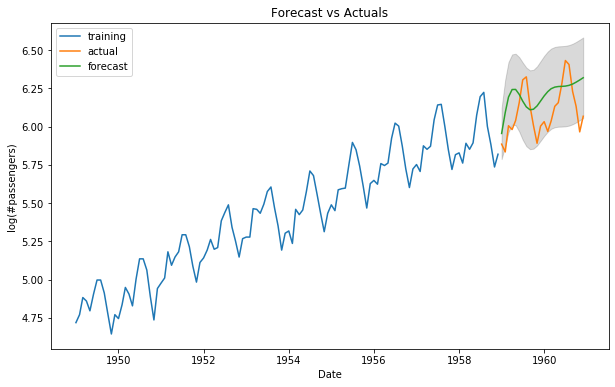

In [27]:
# train-test split (use df_log)
train = df_log.iloc[:len(df_log)-24]
test = df_log.iloc[len(df_log)-24:]

# build ARIMA model & train
model = ARIMA(train, order=(2, 1, 2))  
results_ARIMA = model.fit()  

# forecast for the testset
fc, stderr, conf = results_ARIMA.forecast(steps=len(test), alpha=0.05)  # 95% conf (default)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

plt.xlabel('Date')
plt.ylabel('log(#passengers)')
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

# 5) Building SARIMAX Model <a name="sarimax"></a>
* SARIMAX doesn't need to take log first and work fine

## 5.1) Find params for SARIMAX model: Auto Search <a name="5.1"></a>
To auto find the optimal order=**(p,d,q)**, seasonal_order=**(P,D,Q,S)** using auto_arima for **SARIMAX** model

In [28]:
stepwise_fit = auto_arima(df,                 # SARIMAX doesn't need to take log first and work fine
                          max_p=7, max_d=5, max_q=7,
                          max_P=4, max_D=4, max_Q=4,
                          seasonal = True,
                          m = 12,             # The period for seasonal differencing
                          trace = True)       # print status on the fits

Performing stepwise search to minimize aic


D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(1,1,1,12) [intercept=True]; AIC=1019.203, BIC=1042.204, Time=1.618 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1033.479, BIC=1039.229, Time=0.013 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1022.316, BIC=1033.817, Time=0.243 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1022.904, BIC=1034.405, Time=0.274 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1031.508, BIC=1034.383, Time=0.013 seconds


D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(0,1,1,12) [intercept=True]; AIC=1019.088, BIC=1039.215, Time=1.051 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(1,1,0,12) [intercept=True]; AIC=1018.646, BIC=1038.772, Time=1.175 seconds
Near non-invertible roots for order (2, 1, 2)(1, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(2,1,1,12) [intercept=True]; AIC=1017.501, BIC=1043.378, Time=3.522 seconds
Near non-invertible roots for order (2, 1, 2)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.991)


D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(1,1,2,12) [intercept=True]; AIC=1021.173, BIC=1047.050, Time=3.373 seconds
Near non-invertible roots for order (2, 1, 2)(1, 1, 2, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(2,1,2)x(0,1,0,12) [intercept=True]; AIC=1018.753, BIC=1036.004, Time=0.465 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(0,1,2,12) [intercept=True]; AIC=1019.196, BIC=1042.198, Time=2.788 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 2, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(2,1,0,12) [intercept=True]; AIC=1018.883, BIC=1041.885, Time=3.053 seconds
Near non-invertible roots for order (2, 1, 2)(2, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)


D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(2,1,2,12) [intercept=True]; AIC=1020.716, BIC=1049.468, Time=3.886 seconds
Near non-invertible roots for order (2, 1, 2)(2, 1, 2, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA(1,1,2)x(1,1,1,12) [intercept=True]; AIC=1026.015, BIC=1046.141, Time=0.821 seconds


D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,1)x(1,1,1,12) [intercept=True]; AIC=1017.771, BIC=1037.898, Time=1.405 seconds
Near non-invertible roots for order (2, 1, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)


D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(3,1,2)x(1,1,1,12) [intercept=True]; AIC=1017.129, BIC=1043.005, Time=1.736 seconds
Near non-invertible roots for order (3, 1, 2)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,3)x(1,1,1,12) [intercept=True]; AIC=1022.341, BIC=1048.218, Time=1.862 seconds
Near non-invertible roots for order (2, 1, 3)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=1024.195, BIC=1041.446, Time=0.718 seconds


D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,1,3)x(1,1,1,12) [intercept=True]; AIC=1019.373, BIC=1042.375, Time=1.673 seconds
Near non-invertible roots for order (1, 1, 3)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(3,1,1)x(1,1,1,12) [intercept=True]; AIC=1019.489, BIC=1042.490, Time=1.340 seconds
Near non-invertible roots for order (3, 1, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(3,1,3)x(1,1,1,12) [intercept=True]; AIC=1014.679, BIC=1043.431, Time=2.345 seconds
Near non-invertible roots for order (3, 1, 3)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 33.431 seconds


D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [29]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 12)   Log Likelihood                -497.340
Date:                              Thu, 18 Jun 2020   AIC                           1014.679
Time:                                      13:42:24   BIC                           1043.431
Sample:                                           0   HQIC                          1026.363
                                              - 144                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2609      0.163      1.601      0.109      -0.058       0.580
ar.L1         -0.2278      0.091     -2.490      0.013      -0.407      -0.048
ar.L2         -0.1746      0.093     -1.874      0.061      -0.357       0.008
ar.L3          0.7014      0.091      7.713      0.000       0.523       0.880
ma.L1         -0.1097      1.482     -0.074      0.941      -3.014       2.795
ma.L2          0.0918      1.320      0.070      0.945      -2.495       2.678
ma.L3         -0.9806      1.468     -0.668      0.504      -3.859       1.897
ar.S.L12      -0.9242      0.210     -4.410      0.000      -1.335      -0.513
ma.S.L12       0.8346      0.305      2.740      0.006       0.238       1.432
sigma2       110.7706    162.043      0.684      0.494    -206.828     428.369
===================================================================================
Ljung-Box (Q):                       39.06   Jarque-Bera (JB):                 8.21
Prob(Q):                              0.51   Prob(JB):                         0.02
Heteroskedasticity (H):               2.25   Skew:                             0.09
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

* **SARIMAX(3, 1, 3)x(1, 1, 1, 12)** give min aic

## 5.2) Build SARIMAX model & train <a name="5.2"></a>

In [30]:
# train-test split (use df)
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

# build SARIMAX model & train
model = SARIMAX(train, order=(3,1,3), seasonal_order=(1,1,1,12))
results_SARIMAX = model.fit()

results_SARIMAX.summary()

D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          #Passengers   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 12)   Log Likelihood                -442.061
Date:                              Thu, 18 Jun 2020   AIC                            902.123
Time:                                      13:42:27   BIC                            927.135
Sample:                                  01-01-1949   HQIC                           912.280
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2760      0.341      0.810      0.418      -0.392       0.944
ar.L2         -0.1183      0.296     -0.400      0.689      -0.698       0.461
ar.L3          0.4215      0.263      1.602      0.109      -0.094       0.937
ma.L1         -0.5305      0.320     -1.659      0.097      -1.157       0.096
ma.L2          0.2787      0.282      0.987      0.324      -0.275       0.832
ma.L3         -0.6829      0.228     -2.993      0.003      -1.130      -0.236
ar.S.L12      -0.9407      0.211     -4.457      0.000      -1.354      -0.527
ma.S.L12       0.8656      0.312      2.777      0.005       0.255       1.477
sigma2        95.9680     11.333      8.468      0.000      73.755     118.181
===================================================================================
Ljung-Box (Q):                       35.41   Jarque-Bera (JB):                 5.34
Prob(Q):                              0.68   Prob(JB):                         0.07
Heteroskedasticity (H):               1.45   Skew:                            -0.19
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 5.3) Prediction / forecasting <a name="5.3"></a>

In [31]:
# results_SARIMAX.plot_predict(start=1, end=264)   # SARIMAX doesn't have plot_predict method

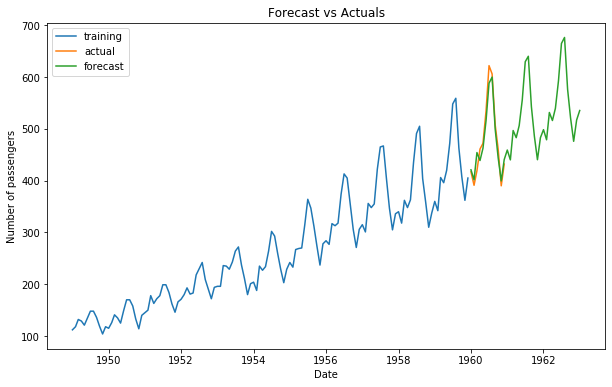

In [32]:
# forecast for the testset
fc = results_SARIMAX.predict(start=len(df)-12, end=len(df)+24)

# Plot
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')

plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

# 6) LSTM model <a name="lstm"></a>
* Forget Gate: conditionally decides what information to throw away from the block.
* Input Gate: conditionally decides which values from the input to update the memory state.
* Output Gate: conditionally decides what to output based on input and the memory of the block.

In [293]:
from sklearn.preprocessing import MinMaxScaler

from keras.preprocessing.sequence import TimeseriesGenerator

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

## 6.1) Time-series data generator <a name="6.1"></a>
TimeseriesGenerator supports multi time-series inputs. Here, we use one time-series input for simplicity.

In [298]:
# train-test split (use df)
train = df.iloc[:len(df)-24]
test = df.iloc[len(df)-24:]

### Normalizing input data for LSTM model first
LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the **MinMaxScaler** preprocessing class from the scikit-learn library.

In [299]:
scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)
df_scaled = scaler.fit_transform(df)

len(train_scaled)

120

### Time series Generator for data (X,y) input to the LSTM model
    series = array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    
    X,			y
    [1, 2]		3
    
    generator = TimeseriesGenerator(series, series, length=2, batch_size=1)
    
    len(generator): 8 (10-2)

In [300]:
x_len = 12
y_len = 1

# Create train & test time-series generator
train_generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled,
                                      length = x_len,        # use 12 timestep for training
                                      batch_size = y_len)    # return 1 timestep (13th)
test_generator = TimeseriesGenerator(data = test_scaled, targets = test_scaled,
                                     length = x_len,    
                                     batch_size = y_len) 
df_generator = TimeseriesGenerator(data = df_scaled, targets = df_scaled,
                                   length = x_len, 
                                   batch_size = y_len) 


print('len(train_generator):', len(train_generator))
print('len(test_generator):', len(test_generator))
print('len(df_generator):', len(df_generator))

len(train_generator): 108
len(test_generator): 12
len(df_generator): 132


## 6.2) Build LSTM model <a name="6.2"></a>

In [301]:
# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', dropout=0.2, recurrent_dropout=0.2, input_shape=(x_len, 1)))
lstm_model.add(Dense(1))

# Compile
lstm_model.compile(loss='mse', optimizer='adam')

lstm_model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 200)               161600    
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [302]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
             EarlyStopping(monitor='val_loss', patience=10),
             ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=5, cooldown=2, min_lr=1e-6),
             ModelCheckpoint(filepath='model/best_model.h5', monitor='val_loss',
                             save_best_only=True, save_weights_only=False)
            ]

### Training

In [303]:
history = lstm_model.fit_generator(generator = train_generator,
                                   validation_data = test_generator,
                                   epochs=20,
                                   callbacks = callbacks
                                  )

Epoch 1/20
108/108 [==============================] - 4s 33ms/step - loss: 0.0596 - val_loss: 0.0266
Epoch 2/20
108/108 [==============================] - 2s 15ms/step - loss: 0.0373 - val_loss: 0.0909
Epoch 3/20
108/108 [==============================] - 2s 15ms/step - loss: 0.0307 - val_loss: 0.0198
Epoch 4/20
108/108 [==============================] - 2s 15ms/step - loss: 0.0269 - val_loss: 0.0274
Epoch 5/20
108/108 [==============================] - 2s 15ms/step - loss: 0.0229 - val_loss: 0.0384
Epoch 6/20
108/108 [==============================] - 2s 15ms/step - loss: 0.0352 - val_loss: 0.0042
Epoch 7/20
108/108 [==============================] - 2s 15ms/step - loss: 0.0269 - val_loss: 0.0129
Epoch 8/20
108/108 [==============================] - 2s 15ms/step - loss: 0.0237 - val_loss: 0.0298
Epoch 9/20
108/108 [==============================] - 2s 15ms/step - loss: 0.0200 - val_loss: 0.0481
Epoch 10/20
108/108 [==============================] - 2s 15ms/step - loss: 0.0236 - val_lo

In [304]:
history.history.keys()

dict_keys(['val_loss', 'loss', 'lr'])

## 6.3) Model Evaluation <a name="6.3"></a>

### Plot learning rate & loss

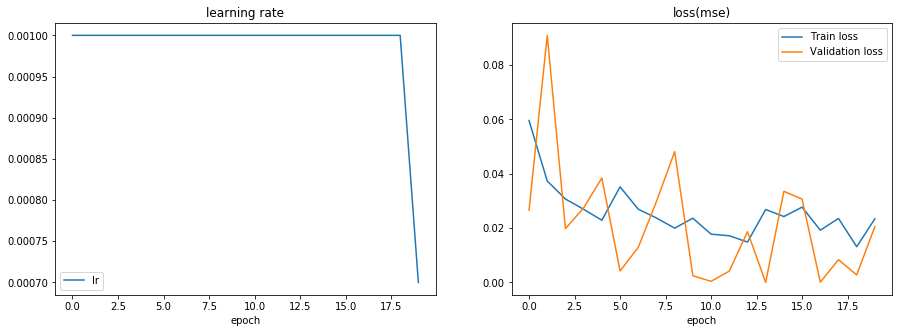

In [305]:
def show_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('learning rate')
    ax[0].plot(history.epoch, history.history["lr"], label="lr")

    ax[1].set_title('loss(mse)')
    ax[1].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[1].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    
    ax[0].legend()
    ax[1].legend()
    
    ax[0].set_xlabel('epoch')
    ax[1].set_xlabel('epoch')

show_history(history)

### mse

In [306]:
score = lstm_model.evaluate_generator(test_generator)

print("loss(mse):", score)

loss(mse): 0.020587623119354248


## 6.4) Prediction / forecasting <a name="6.4"></a>

In [307]:
pred_df_scaled = lstm_model.predict_generator(df_generator)
pred_df = scaler.inverse_transform(pred_df_scaled)
pred_df = pd.Series(np.squeeze(pred_df), index = df.index[x_len:])
pred_df

Month
1950-01-01    232.418396
1950-02-01    233.899658
1950-03-01    235.737137
1950-04-01    237.197113
1950-05-01    236.538239
                 ...    
1960-08-01    445.176422
1960-09-01    425.615875
1960-10-01    398.694519
1960-11-01    386.327148
1960-12-01    376.690308
Length: 132, dtype: float32

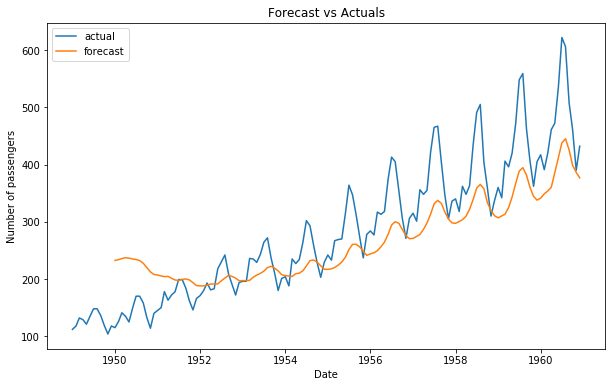

In [308]:
# Plot
plt.plot(df, label='actual')
plt.plot(pred_df, label='forecast')

plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

# 7) Conclusion <a name="conclusion"></a>

* SARIMAX: for simple forecasting
    * pros: Fast, easy to use
    * cons: cannot handle multi time-series inputs
* LSTM: for complex forecasting
    * pros: allow multi time-series inputs
    * cons: Slow, many hyperparams needed to be tuned, different LSTM architectures needed to be test for the best forecasting